In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset/apples_and_oranges.csv')

In [5]:
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [3]:
df1 = df.copy()

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df1['Class_encoded'] = label_encoder.fit_transform(df1['Class'])

df1.head()

,Weight,Size,Class,Class_encoded
0,69,4.39,orange,1
1,69,4.21,orange,1
2,65,4.09,orange,1
3,72,5.85,apple,0
4,67,4.70,orange,1


In [9]:
df1.drop('Class', axis = 1, inplace = True)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df1.drop(['Class_encoded'],axis=1))
scaled_features = scaler.transform(df1.drop(['Class_encoded'],axis=1))

df_scaled = pd.DataFrame(scaled_features,columns=df1.columns[:2])
df_scaled.head()

,Weight,Size
0,0.4,0.206522
1,0.4,0.108696
2,0.0,0.043478
3,0.7,1.000000
4,0.2,0.375000


In [13]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

X = df_scaled
y= df1.Class_encoded

smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.30,random_state=42,shuffle=True)

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))

Train Score: 1.0
Test Score: 1.0


F:\Applications\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


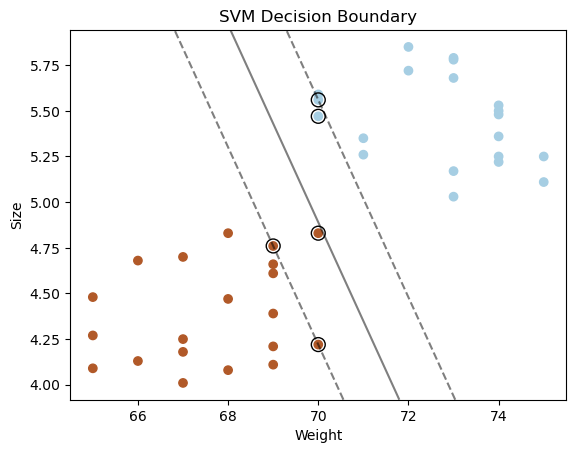

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd

# Sample data with "Weight," "Size," and "Class_encoded"


# Extract features and labels
X = df1[['Weight', 'Size']]
y = df1['Class_encoded']

# Create an SVM classifier
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Plot the decision boundary
plt.scatter(X['Weight'], X['Size'], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

# Highlight support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('Weight')
plt.ylabel('Size')
plt.title('SVM Decision Boundary')
plt.show()